Opening raw data file D:\ds005234\derivatives\sub-Z201\meg\sub-Z201_task-vowels_proc-tsss+mc+transtooptimal+0110hz+ssp_meg.fif...
    Read a total of 4 projection items:
        ECG-planar--0.200-0.400-PCA-01 (1 x 204) active
        ECG-planar--0.200-0.400-PCA-02 (1 x 204) active
        ECG-axial--0.200-0.400-PCA-01 (1 x 102) active
        ECG-axial--0.200-0.400-PCA-02 (1 x 102) active
    Range : 45000 ... 1618999 =     45.000 ...  1618.999 secs
Ready.
Opening raw data file D:\ds005234\derivatives\sub-Z201\meg\sub-Z201_task-vowels_proc-tsss+mc+transtooptimal+0110hz+ssp_meg-1.fif...
    Read a total of 4 projection items:
        ECG-planar--0.200-0.400-PCA-01 (1 x 204) active
        ECG-planar--0.200-0.400-PCA-02 (1 x 204) active
        ECG-axial--0.200-0.400-PCA-01 (1 x 102) active
        ECG-axial--0.200-0.400-PCA-02 (1 x 102) active
    Range : 1619000 ... 1666999 =   1619.000 ...  1666.999 secs
Ready.
Finding events on: STI101
1081 events found on stim channel STI101
Event I

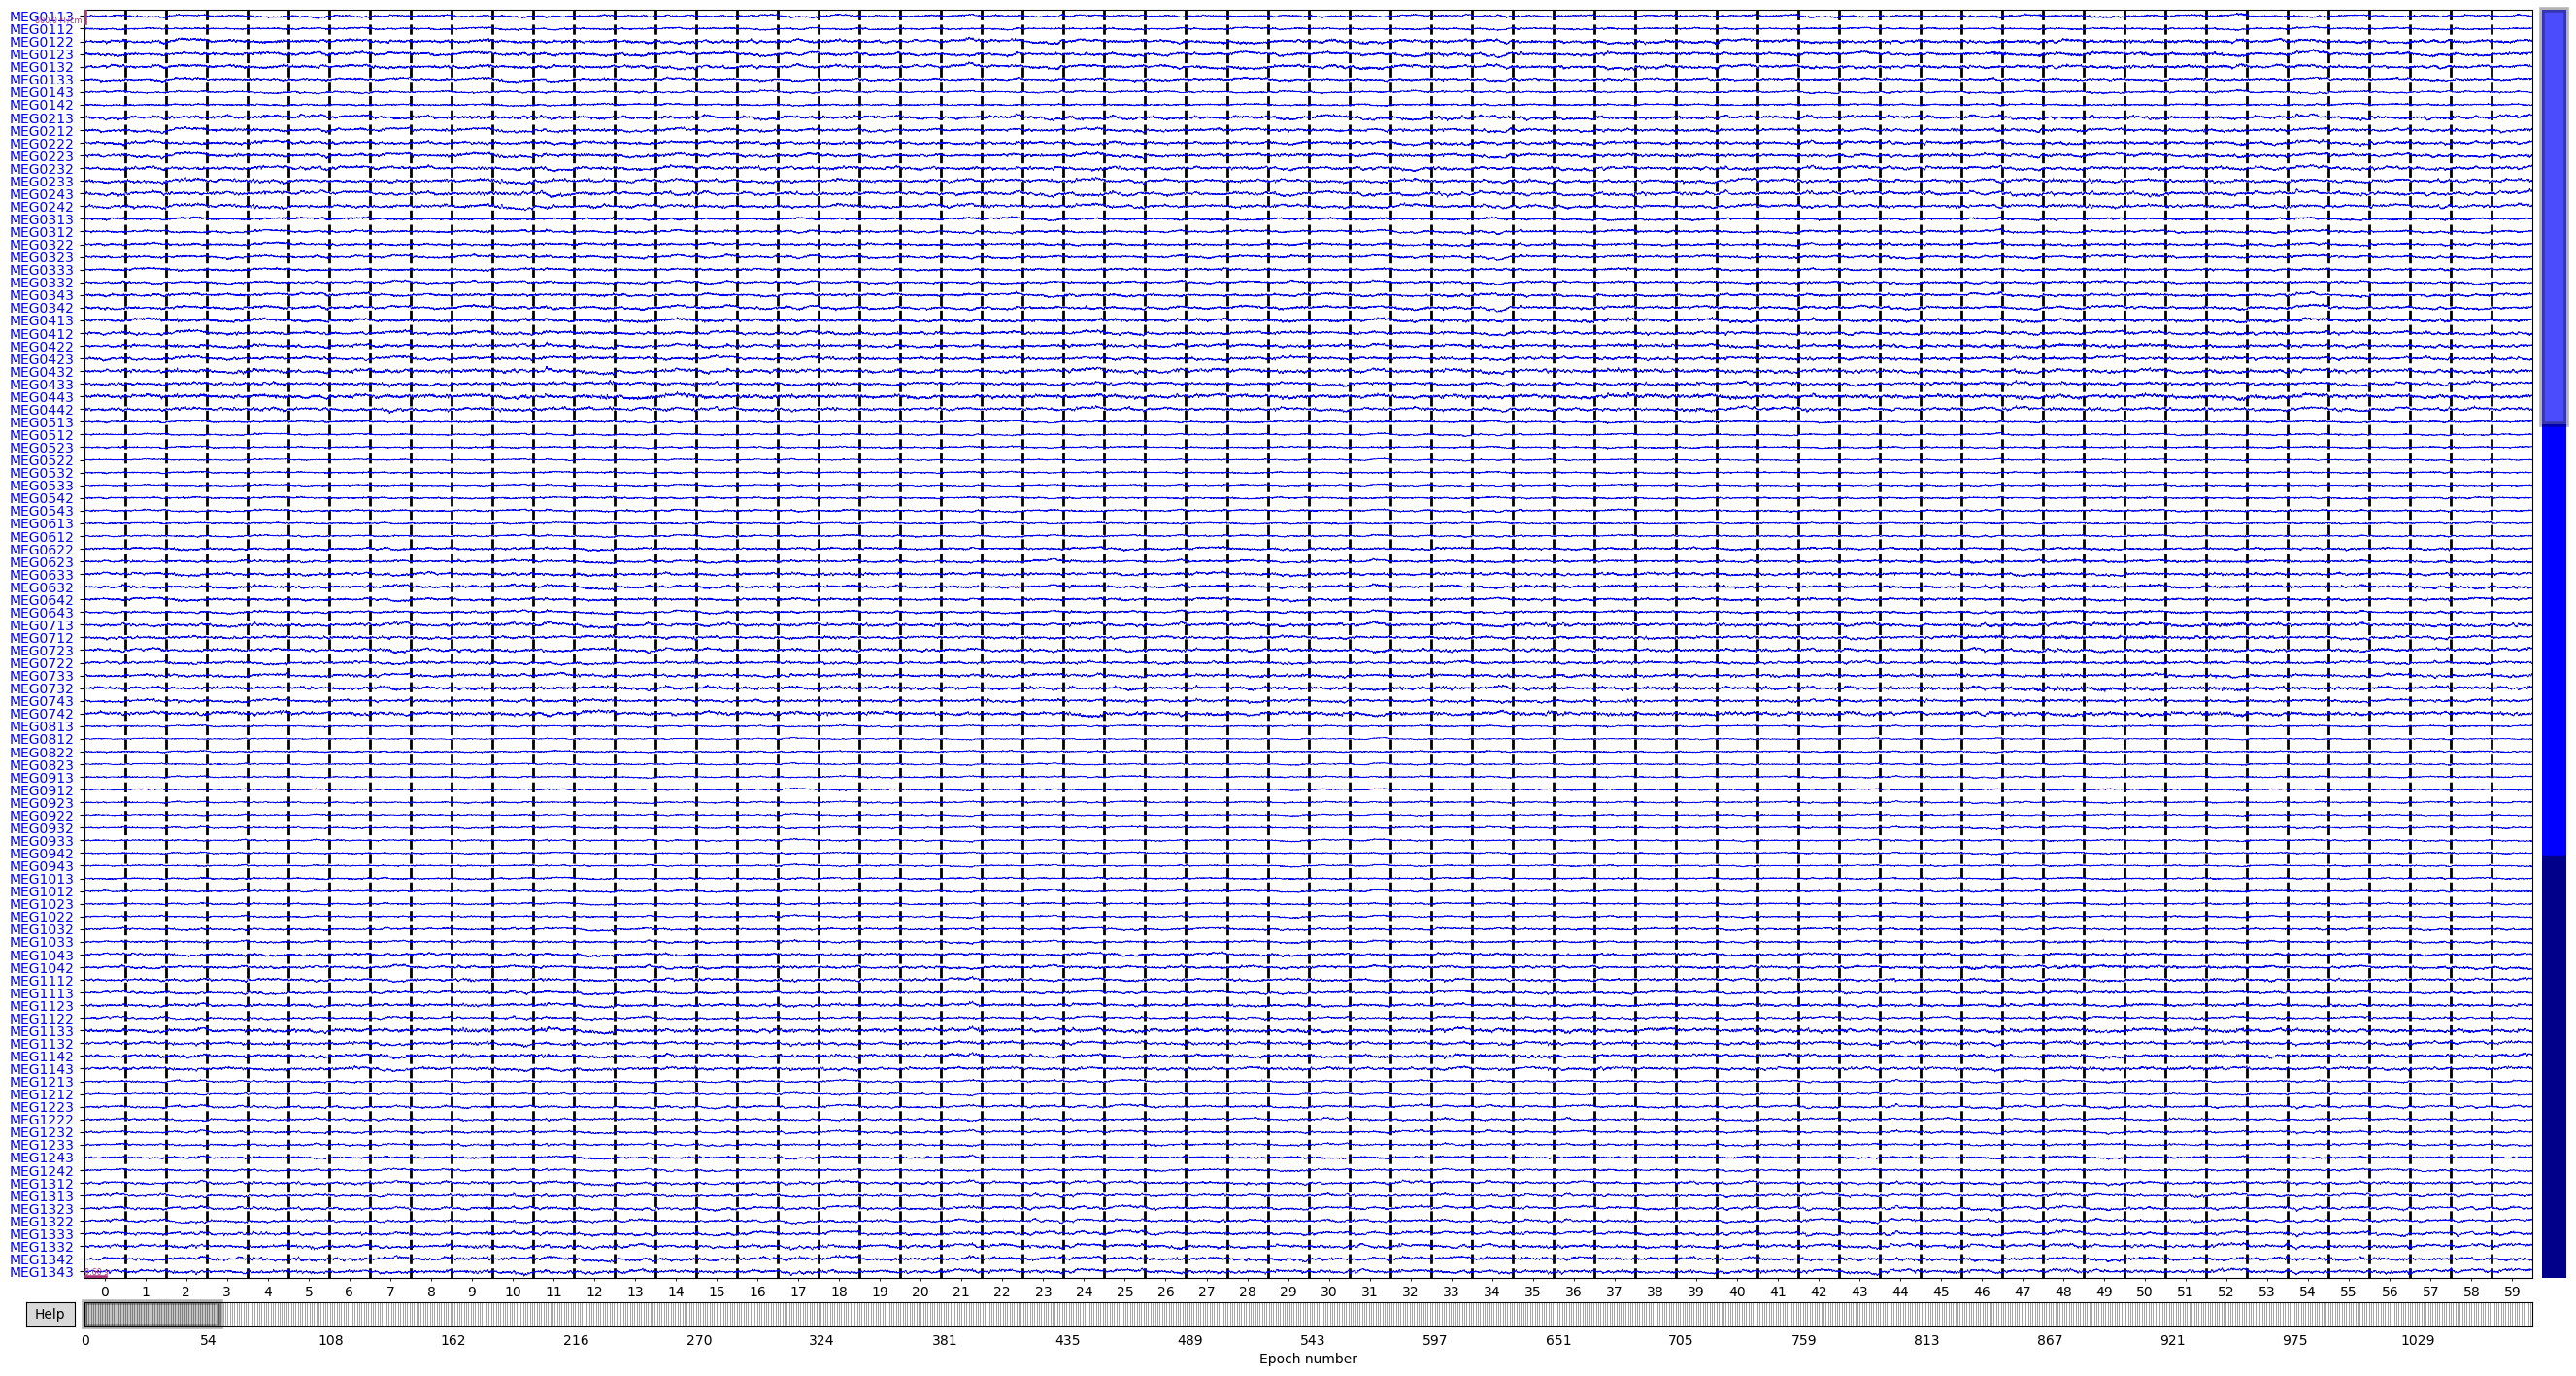

Loading data for 1 events and 1201 original time points ...
Loading data for 1077 events and 1201 original time points ...


In [1]:
def make_eve_and_epo(bids_root, subject):
   
    import mne
    import mne_bids
    
    bids_derivatives = bids_root + r'derivatives\\'
    
    bids_path = mne_bids.BIDSPath(subject=subject,
                         root=bids_derivatives,
                         task='vowels',
                         datatype='meg',
                         processing='tsss+mc+transtooptimal+0110hz+ssp',
                         extension='.pos')
    
    raw = mne.io.read_raw_fif(str(bids_path.fpath) + '_meg.fif')
    
    reject_criteria = dict(mag=7e-12, grad=7e-10)
    flat_criteria = dict(mag=1e-15, grad=1e-13)
    
    event_dict = {'dv/a': 1, 'dv/i': 2, 'dv/o': 3,'mp/1': 4, 'mp/2': 5, 'mp/3': 6,
                  'rv/a': 7, 'rv/e': 8, 'rv/u': 9,'mr/1': 10, 'mr/2': 11, 'mr/3': 12}
    

    events = mne.find_events(raw, stim_channel='STI101', shortest_event=1)
    
    for e in [13,14,15]:
        events = events[events[:,2]!=e,:]

    events = events[events[:,1]==0,:]
    if subject in ['Z201']:
            events[:,0] = events[:,0] + 52
    events[:,0] = events[:,0] + 6

    epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=1, event_id=event_dict, preload=False)
    epochs.drop_bad(reject=reject_criteria, flat=flat_criteria)
    epochs.plot(n_epochs = 60, n_channels = 100)
    
    
    epo_bids_path = mne_bids.BIDSPath(subject=subject,
                         root=bids_derivatives,
                         task='vowels',
                         datatype='meg',
                         processing='tsss+mc+transtooptimal+0110hz+ssp',
                         description='cleaned',
                         extension='.pos')
    
    events = epochs.events
    
    filename = str(epo_bids_path.fpath) + '-eve.fif'
    
    mne.write_events(filename, events, overwrite=True)
    
    filename = str(epo_bids_path.fpath) + '-epo.fif'
    
    epochs.save(filename, overwrite=True)

subjects_names = ['Z201']

bids_root = r'D:\\ds005234\\'

for subject in subjects_names:
   make_eve_and_epo(bids_root, subject)